# Introduction to Image Processing
This notebook walks through The prcoccess of implementing the algorithms seen in a series of lectures on image processing.

### Importing libraries and Packages

In [28]:
from matplotlib.pyplot import *

import numpy as np

In [37]:
image = imread ("../data/imgs/lenna.jpg")

def plot_1 (image) :
    imshow (image, cmap = "gray")

def plot_2 (image_1, image_2) :
    fig = figure(figsize=(18,8))

    ax = fig.add_subplot(1, 2, 1)
    ax.set_title('Before')
    plot_1 (image_1)

    ax = fig.add_subplot(1, 2, 2)
    ax.set_title('After')
    plot_1 (image_2)

In [38]:
def neumann_boundary (image, border_size = 1) :
    d = border_size
    
    m, n = np.shape (image)
    
    M = m + 2 * d
    N = n + 2 * d

    J = np.zeros ((M, N))
    J [(d-1):(M-d-1), (d-1):(N-d-1)] = image

    for i in range (m) :
        for j in range (d) :
            J [i+d-1, j] = image [i, d-j-1]

        for j in range (N-d-1, N) :
            J[i+d-1,j] = image [i, N-d-j-1]

    for j in range (N) :
        for i in range (d) :
            J [i,j] = J [2*d-1-i, j]

        for i in range (M-d-1, M) :
            J [i,j] = J [2*(M-d-1)-1-i, j]


    return J

In [3]:
def gaussian_noise (image, noise = 5) :
    m, n = np.shape (image)

    J = np.zeros ((m, n))
    J = noise * np.random.randn(m)

    return image + J

In [24]:
def compute_1 (image) :
    J = neumann_boundary (image, d := 1)
    M, N = np.shape (J)
        
    J_x = np.zeros ((M, N))
    J_y = np.zeros ((M, N))
    
    for i in range (d, M-d) :
        for j in range (d, N-d) :
            J_x [i, j] = ( J [i+1,j] - J [i-1,j] ) / 2
            J_y [i, j] = ( J [i,j+1] - J [i,j-1] ) / 2
             
    return J_x, J_y

def compute_2 (J) :    
    d = 1
    M, N = np.shape (J)
        
    J_xx = np.zeros ((M, N))
    J_yy = np.zeros ((M, N))
    J_xy = np.zeros ((M, N))

    for i in range (d, M-d) :
        for j in range (d, N-d) :
            J_xx [i, j] = ( J [i+1,j] - 2 * J [i,j] + J [i,j-1] )
            J_yy [i, j] = ( J [i,j+1] - 2 * J [i,j] + J [i,j-1] )
            J_xy [i, j] = ( J [i+1,j+1] - J [i+1,j-1] - J [i-1,j+1] + J [i-1,j-1] ) / 4

    return J_xx, J_yy, J_xy

In [33]:
def heat_equation (image, dt = .25, noise = 5, N = 50) :
    I0 = gaussian_noise (image)

    J = I0
    for i in range (N) :
        J_xx, J_yy, J_xy = compute_2 (J)

        laplacien_J = J_xx + J_yy
        J += laplacien_J * dt
    return J


image_1 = neumann_boundary (image, 1)
image_2 = heat_equation (image_1)



Image size before applying heat equation (258, 258) 
Image size after applying heat equation (258, 258)


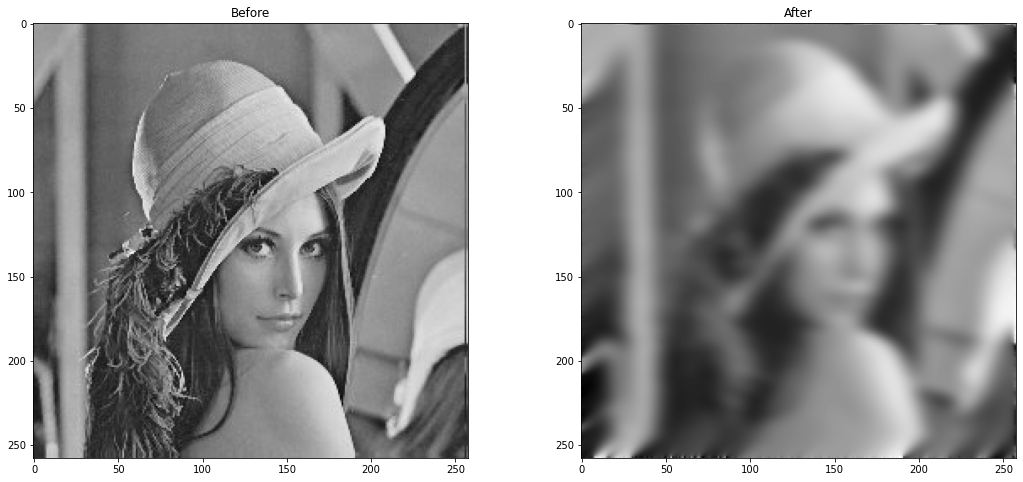

In [36]:
plot_2 (image_1, image_2)
print (
    "Image size before applying heat equation", np.shape (image_1), "\n"
    "Image size after applying heat equation", np.shape (image_2)
)